In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
plt.rcParams["figure.figsize"] = [10,5]
# Ignore warnings

import warnings
# Set the warning filter to ignore FutureWarning
warnings.simplefilter(action = "ignore", category = FutureWarning)

In [2]:
%matplotlib inline

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [5]:
full_data = pd.read_csv('/content/titanic_dataset (1).csv')

In [6]:
full_data.shape

(891, 12)

In [7]:
# Data shape
print('train data:',full_data.shape)

train data: (891, 12)


In [8]:
# View first few rows
full_data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [10]:
# Data Info
full_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


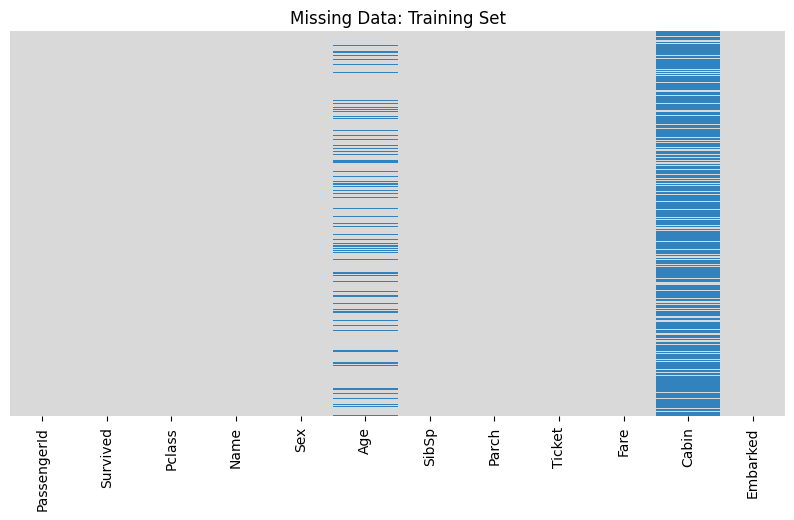

In [11]:
# Heatmap
sns.heatmap(full_data.isnull(),yticklabels = False, cbar = False,cmap = 'tab20c_r')
plt.title('Missing Data: Training Set')
plt.show()

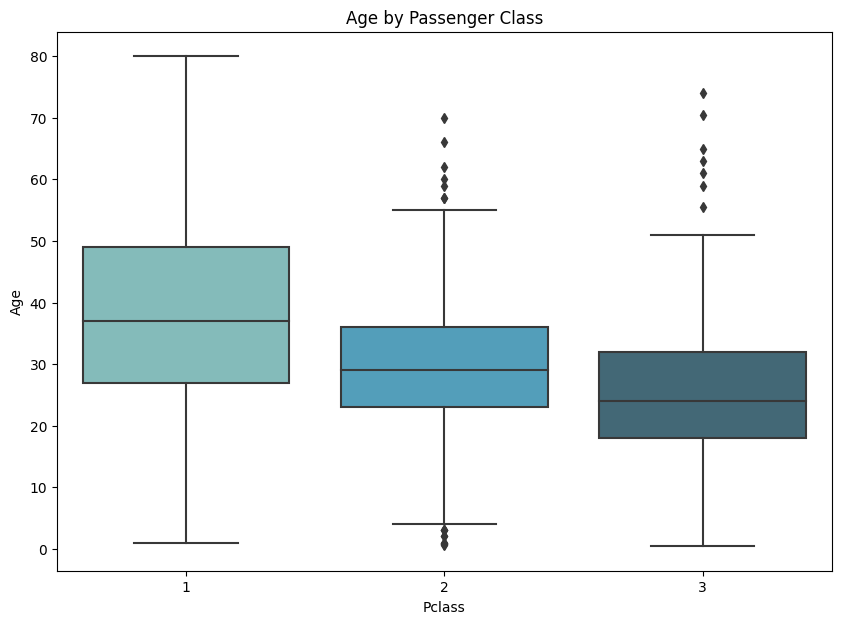

In [12]:
plt.figure(figsize = (10,7))
sns.boxplot(x = 'Pclass', y = 'Age', data = full_data, palette= 'GnBu_d').set_title('Age by Passenger Class')
plt.show()

In [13]:
# Imputation function
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]

    if pd.isnull(Age):

        if Pclass == 1:
            return 37

        elif Pclass == 2:

            return 29

        else:
            return 24

    else:
        return Age

# Apply the function to the Age column
full_data['Age']=full_data[['Age','Pclass']].apply(impute_age, axis =1 )

In [ ]:
# Remove Cabin feature
full_data.drop('Cabin', axis = 1, inplace = True)

In [17]:
# Remove rows with missing data
full_data.dropna(inplace = True)

In [18]:
full_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,24.0,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [ ]:
# Remove unnecessary columns
full_data.drop(['Name','Ticket'], axis = 1, inplace = True)

# Convert objects to category data type
objcat = ['Sex','Embarked']

for colname in objcat:
    full_data[colname] = full_data[colname].astype('category'

In [20]:
full_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,24.0,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [21]:
# Numeric summary
full_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,446.000000,0.382452,2.311586,29.019314,0.524184,0.382452,32.096681
std,256.998173,0.486260,0.834700,13.209814,1.103705,0.806761,49.697504
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,224.000000,0.000000,2.000000,22.000000,0.000000,0.000000,7.895800
50%,446.000000,0.000000,3.000000,26.000000,0.000000,0.000000,14.454200
75%,668.000000,1.000000,3.000000,36.500000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [22]:
# Remove PassengerId
full_data.drop('PassengerId', inplace = True, axis = 1)

In [23]:
# Shape of train data
full_data.shape

(889, 10)

In [24]:
# Identify categorical features
full_data.select_dtypes(['category']).columns

Index([], dtype='object')

In [ ]:
# Convert categorical variables into 'dummy' or indicator variables
sex = pd.get_dummies(full_data['Sex'], drop_first = True) # drop_first prevents multi-collinearity
embarked = pd.get_dummies(full_data['Embarked'], drop_first = True

In [26]:
full_data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [ ]:
# Add new dummy columns to data frame
full_data = pd.concat([full_data, sex, embarked], axis = 1)
full_data.head(5)

In [28]:
# Drop unecessary columns
full_data.drop(['Sex', 'Embarked'], axis = 1, inplace = True)

# Shape of train data
print('train_data shape',full_data.shape)

# Confirm changes
full_data.head()

train_data shape (889, 8)


,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare
0,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833
2,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000
4,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500


In [29]:
# Split data to be used in the models
# Create matrix of features
x = full_data.drop('Survived', axis = 1) # grabs everything else but 'Survived'

# Create target variable
y = full_data['Survived'] # y is the column we're trying to predict

In [30]:
x # x Represents the Features
x.shape

(889, 7)

In [31]:
y # y represents the Target
y.shape

(889,)

In [32]:
# Use x and y variables to split the training data into train and test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = .20, random_state = 101)

In [33]:
x_train.shape
x_train

,Pclass,Name,Age,SibSp,Parch,Ticket,Fare
307,1,"Penasco y Castellana, Mrs. Victor de Satode (M...",17.0,1,0,PC 17758,108.9000
229,3,"Lefebre, Miss. Mathilde",24.0,3,1,4133,25.4667
82,3,"McDermott, Miss. Brigdet Delia",24.0,0,0,330932,7.7875
353,3,"Arnold-Franchi, Mr. Josef",25.0,1,0,349237,17.8000
707,1,"Calderhead, Mr. Edward Pennington",42.0,0,0,PC 17476,26.2875
...,...,...,...,...,...,...,...
576,2,"Garside, Miss. Ethel",34.0,0,0,243880,13.0000
840,3,"Alhomaki, Mr. Ilmari Rudolf",20.0,0,0,SOTON/O2 3101287,7.9250
338,3,"Dahl, Mr. Karl Edwart",45.0,0,0,7598,8.0500
524,3,"Kassem, Mr. Fared",24.0,0,0,2700,7.2292


In [34]:
# y_train.shape
y_train

307    1
229    0
82     1
353    0
707    1
      ..
576    1
840    0
338    1
524    0
865    1
Name: Survived, Length: 711, dtype: int64

In [35]:
x_test.shape
x_test

,Pclass,Name,Age,SibSp,Parch,Ticket,Fare
511,3,"Webber, Mr. James",24.0,0,0,SOTON/OQ 3101316,8.0500
613,3,"Horgan, Mr. John",24.0,0,0,370377,7.7500
615,2,"Herman, Miss. Alice",24.0,1,2,220845,65.0000
337,1,"Burns, Miss. Elizabeth Margaret",41.0,0,0,16966,134.5000
718,3,"McEvoy, Mr. Michael",24.0,0,0,36568,15.5000
...,...,...,...,...,...,...,...
155,1,"Williams, Mr. Charles Duane",51.0,0,1,PC 17597,61.3792
450,2,"West, Mr. Edwy Arthur",36.0,1,2,C.A. 34651,27.7500
756,3,"Carlsson, Mr. August Sigfrid",28.0,0,0,350042,7.7958
187,1,"Romaine, Mr. Charles Hallace (""Mr C Rolmane"")",45.0,0,0,111428,26.5500


In [36]:
# Fit
# Import model
from sklearn.linear_model import LogisticRegression

# Create instance of model
lreg = LogisticRegression()

# Pass training data into model
lreg.fit(x_train, y_train

SyntaxError: ignored

In [37]:
# Predict
y_pred_lreg = lreg.predict(x_test)
print(y_pred_lreg)
print(y_pred_lreg.shape)

NameError: ignored

In [38]:
probabilities = lreg.predict_proba(x_test)[:, 1]
print(probabilities.shape)
print(probabilities)

NameError: ignored

In [39]:
for i in range(len(y_test)):
  print(round(probabilities[i], 3)," --> ", y_pred_lreg[i])

NameError: ignored

In [40]:
# Score It
from sklearn.metrics import classification_report, accuracy_score

print('Classification Model')
# Accuracy
print('--'*30)
logreg_accuracy = round(accuracy_score(y_test, y_pred_lreg) * 100,2)
print('Accuracy', logreg_accuracy,'%')

Classification Model
------------------------------------------------------------


NameError: ignored